<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Projects_Unveiling_Hidden_Insights_in_Hotel_Data_Leveraging_Machine_Learning_for_Customer_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [137]:
!pip install gdown

import gdown

In [138]:
#Projects -Unveiling Hidden Insights in Hotel Data: Leveraging Machine Learning for Customer Profiling

#https://drive.google.com/file/d/15uwJUleJBD62oAcymByf9YJFtu5shBKg/view?usp=drive_link

file_id = "15uwJUleJBD62oAcymByf9YJFtu5shBKg"

output_file = "Hoteldataset.csv"

gdown.download(id = file_id, output = output_file, quiet=False)

df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=15uwJUleJBD62oAcymByf9YJFtu5shBKg
To: /content/Hoteldataset.csv
100%|██████████| 25.1M/25.1M [00:00<00:00, 84.5MB/s]


In [139]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [141]:
df.shape

(119390, 36)

In [142]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [143]:
df.describe(include= np.number)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [144]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##Data Cleaning, feature selection and feature engineering

In [145]:
def plot_null_values(df):
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
  plt.title('Missing Values Heatmap')
  plt.show(), plt.close()

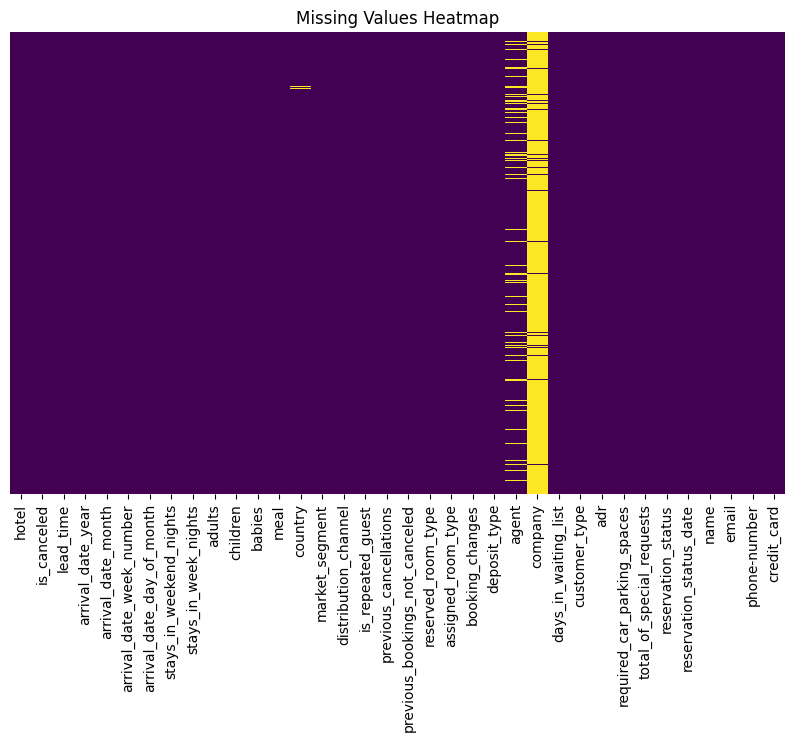

In [146]:
plot_null_values(df)

Country

In [147]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
FJI        1
UMI        1
LCA        1
MRT        1
ASM        1
Name: count, Length: 177, dtype: int64

In [148]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [149]:
df['country'].nunique()

177

In [150]:
def combine_rare_and_fillna_in_countries(df,col):
  unique_country_counts = df[col].value_counts()

  # Countries with maximun  of 10 apperance
  rare_countries = unique_country_counts[unique_country_counts < 100].index.tolist()

  # Replace rare countries with 'Rare'
  df[col] = df[col].apply(lambda x: 'rare' if x in rare_countries else x)

  # Fill missing values with 'others'
  df[col].fillna('Others', inplace=True)

  return df

In [151]:
df = combine_rare_and_fillna_in_countries(df,'country')

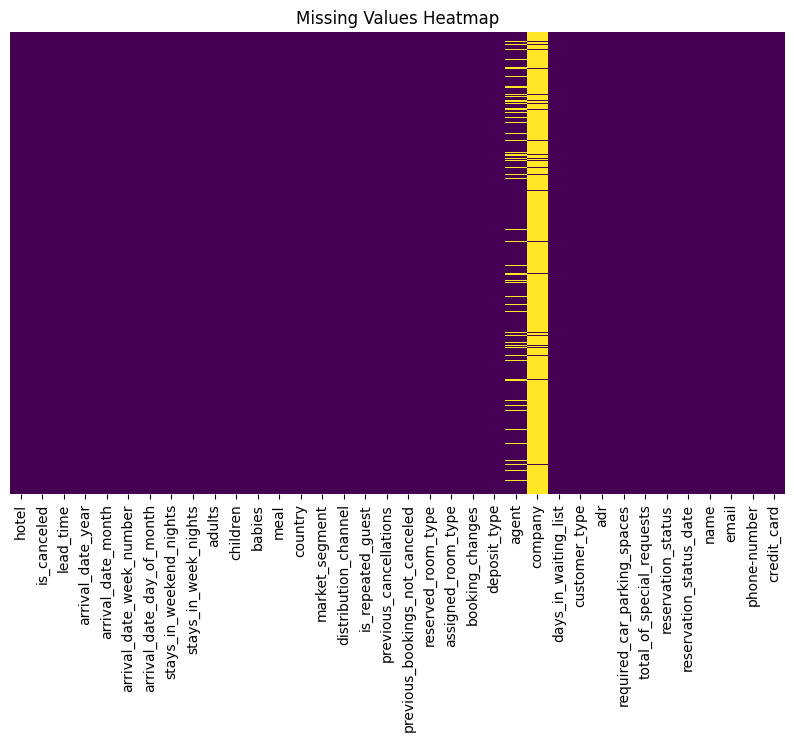

In [152]:
plot_null_values(df) # verifions si nous avons toujours des valeurs manquantes pour la colonne country

Pour les colonnes **agent and company**

Pour ces 2 colonnes nous avons trop de valeurs manquantes, nous allons les supprimer

In [153]:
df.drop(['agent','company'],axis=1, inplace= True)

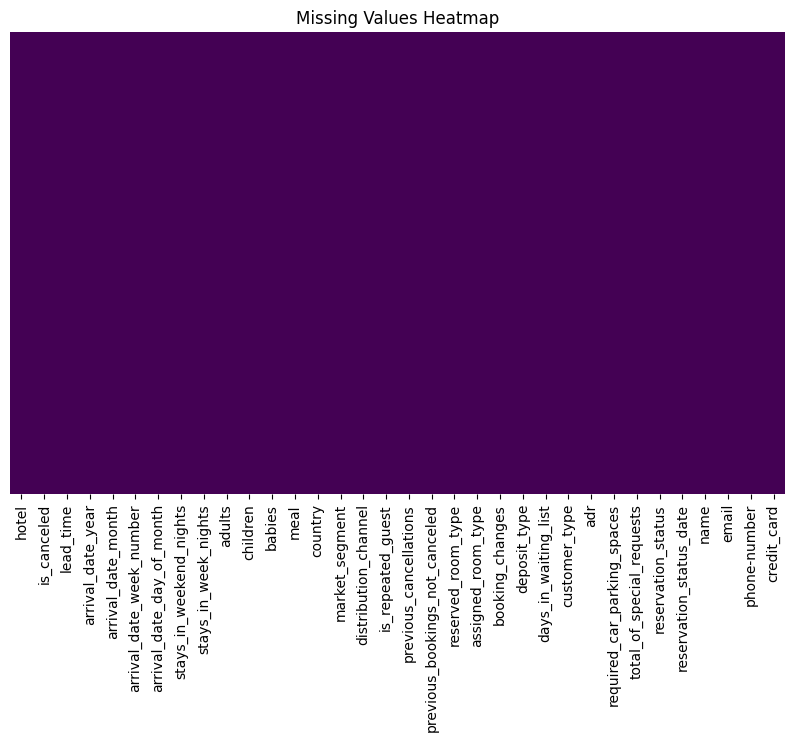

In [154]:
plot_null_values(df)

In [155]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

**Combine related features to reduce dimension**

In [156]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [157]:

def get_month_number(df, col):

  #lister tous les mois
  my_list = df[col].unique().tolist()

  # les 6  dernierrs mois
  last_6_months = my_list[-6:]

  # les 6 premiers mois
  first_6_months = my_list[:6]

  # combine
  combine_months = last_6_months + first_6_months

  # maper les mois
  month_map = {}

  for i, month in enumerate(combine_months):
    month_map[month] = int(i) +1

  df[col] = df[col].map(month_map)

  return df







In [158]:

df = get_month_number(df,'arrival_date_month')

In [159]:
df['arrival_date_month']

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64

In [160]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [161]:
# function to create arrival date
def get_arrival_date(df, year_col, month_col, day_col):

  # rename columns
  df = df.rename(columns={year_col:'year', month_col: 'month', day_col: 'day'})

  # convert to datetime
  df['arrival_date'] = pd.to_datetime(df[['year','month','day']])

  # drop columns
  df.drop(['year','month','day'], axis=1, inplace=True)

  #return df
  return df

In [162]:
df = get_arrival_date(df,'arrival_date_year','arrival_date_month','arrival_date_day_of_month')

In [163]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015-07-01


**Create a column for family size**

En combinant 'adults', 'children', 'babies'

In [164]:
df['family size'] = df[['adults','children','babies']].sum(axis=1)

In [165]:
df['family size']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: family size, Length: 119390, dtype: float64

In [166]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'arrival_date', 'family size'],
      dtype='object')

**Create concellation rate feature  | Créer une fonction de taux de concellation**

In [167]:
# fonction pour calculer le taux d'annulation de reservations

def create_cancellation_feature(df, col_1, col_2):
    # Ajouter une nouvelle colonne 'total_booking' en sommant les colonnes col_1 et col_2
    df['total_booking'] = df[col_1] + df[col_2]

    # Créer une nouvelle colonne 'cancellation_rate' en divisant col_2 par 'total_booking'
    df['cancellation_rate'] = df[col_2] / df['total_booking']

    # Remplacer les valeurs NaN dans 'cancellation_rate' par 0
    df['cancellation_rate'] = df['cancellation_rate'].fillna(0)

    # Supprimer la colonne temporaire 'total_booking' car elle n'est plus nécessaire
    df.drop(['total_booking'], axis=1, inplace=True)

    # Retourner le DataFrame modifié
    return df

In [168]:
df = create_cancellation_feature(df,'previous_cancellations','previous_bookings_not_canceled')

**Drop redundant features and not relevant**

In [169]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'arrival_date', 'family size',
       'cancellation_rate'],
      dtype='object')

In [170]:
df.drop(["arrival_date_week_number", 'adults', 'children','babies', 'name', 'email', 'phone-number','credit_card' ], axis=1, inplace=True)

In [171]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,family size,cancellation_rate
0,Resort Hotel,0,342,0,0,BB,PRT,Direct,Direct,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0.0
1,Resort Hotel,0,737,0,0,BB,PRT,Direct,Direct,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0.0
2,Resort Hotel,0,7,0,1,BB,GBR,Direct,Direct,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0,0.0
3,Resort Hotel,0,13,0,1,BB,GBR,Corporate,Corporate,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0,0.0
4,Resort Hotel,0,14,0,2,BB,GBR,Online TA,TA/TO,0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0,0.0


In [172]:
# select on the numerical features
numerical_features = df.select_dtypes(include=['int64', 'int32', 'float64'])



In [173]:
for i in numerical_features.columns.tolist():
  print(f"{i}  >>>>>>>>>>>> {numerical_features[i].nunique()}")

is_canceled  >>>>>>>>>>>> 2
lead_time  >>>>>>>>>>>> 479
stays_in_weekend_nights  >>>>>>>>>>>> 17
stays_in_week_nights  >>>>>>>>>>>> 35
is_repeated_guest  >>>>>>>>>>>> 2
previous_cancellations  >>>>>>>>>>>> 15
previous_bookings_not_canceled  >>>>>>>>>>>> 73
booking_changes  >>>>>>>>>>>> 21
days_in_waiting_list  >>>>>>>>>>>> 128
adr  >>>>>>>>>>>> 8879
required_car_parking_spaces  >>>>>>>>>>>> 5
total_of_special_requests  >>>>>>>>>>>> 6
family size  >>>>>>>>>>>> 15
cancellation_rate  >>>>>>>>>>>> 111


In [174]:
def plot_feature(df):
    # Définir les noms des colonnes
    feature_names = df.columns

    # Le nombre de barres sur chaque histogramme
    num_bins = 20

    # Nombre de colonnes dans le DataFrame
    num_features = len(feature_names)

    # Nombre de colonnes de graphiques dans la grille
    num_cols = 3

    # Nombre de rangées de graphiques dans la grille (en ajoutant num_cols pour s'assurer que la division soit correcte)
    num_rows = (num_features + num_cols) // num_cols

    # Créer une figure et un tableau d'axes avec num_rows rangées et num_cols colonnes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

    # Ajuster l'espacement entre les sous-graphiques
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Boucler sur chaque fonctionnalité pour créer un histogramme
    for i, feature in enumerate(feature_names):
        # Déterminer la rangée et la colonne pour l'histogramme actuel
        row = i // num_cols
        col = i % num_cols

        # Sélectionner l'axe correspondant
        ax = axes[row, col]
        # Tracer un histogramme de la fonctionnalité actuelle
        ax.hist(df[feature], bins=num_bins, edgecolor='black')
        # Définir le titre de l'histogramme
        ax.set_title(f'Histogram feature {feature}')
        # Définir le label de l'axe x
        ax.set_xlabel(feature)
        # Définir le label de l'axe y
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.close('all')




<Figure size 640x480 with 0 Axes>

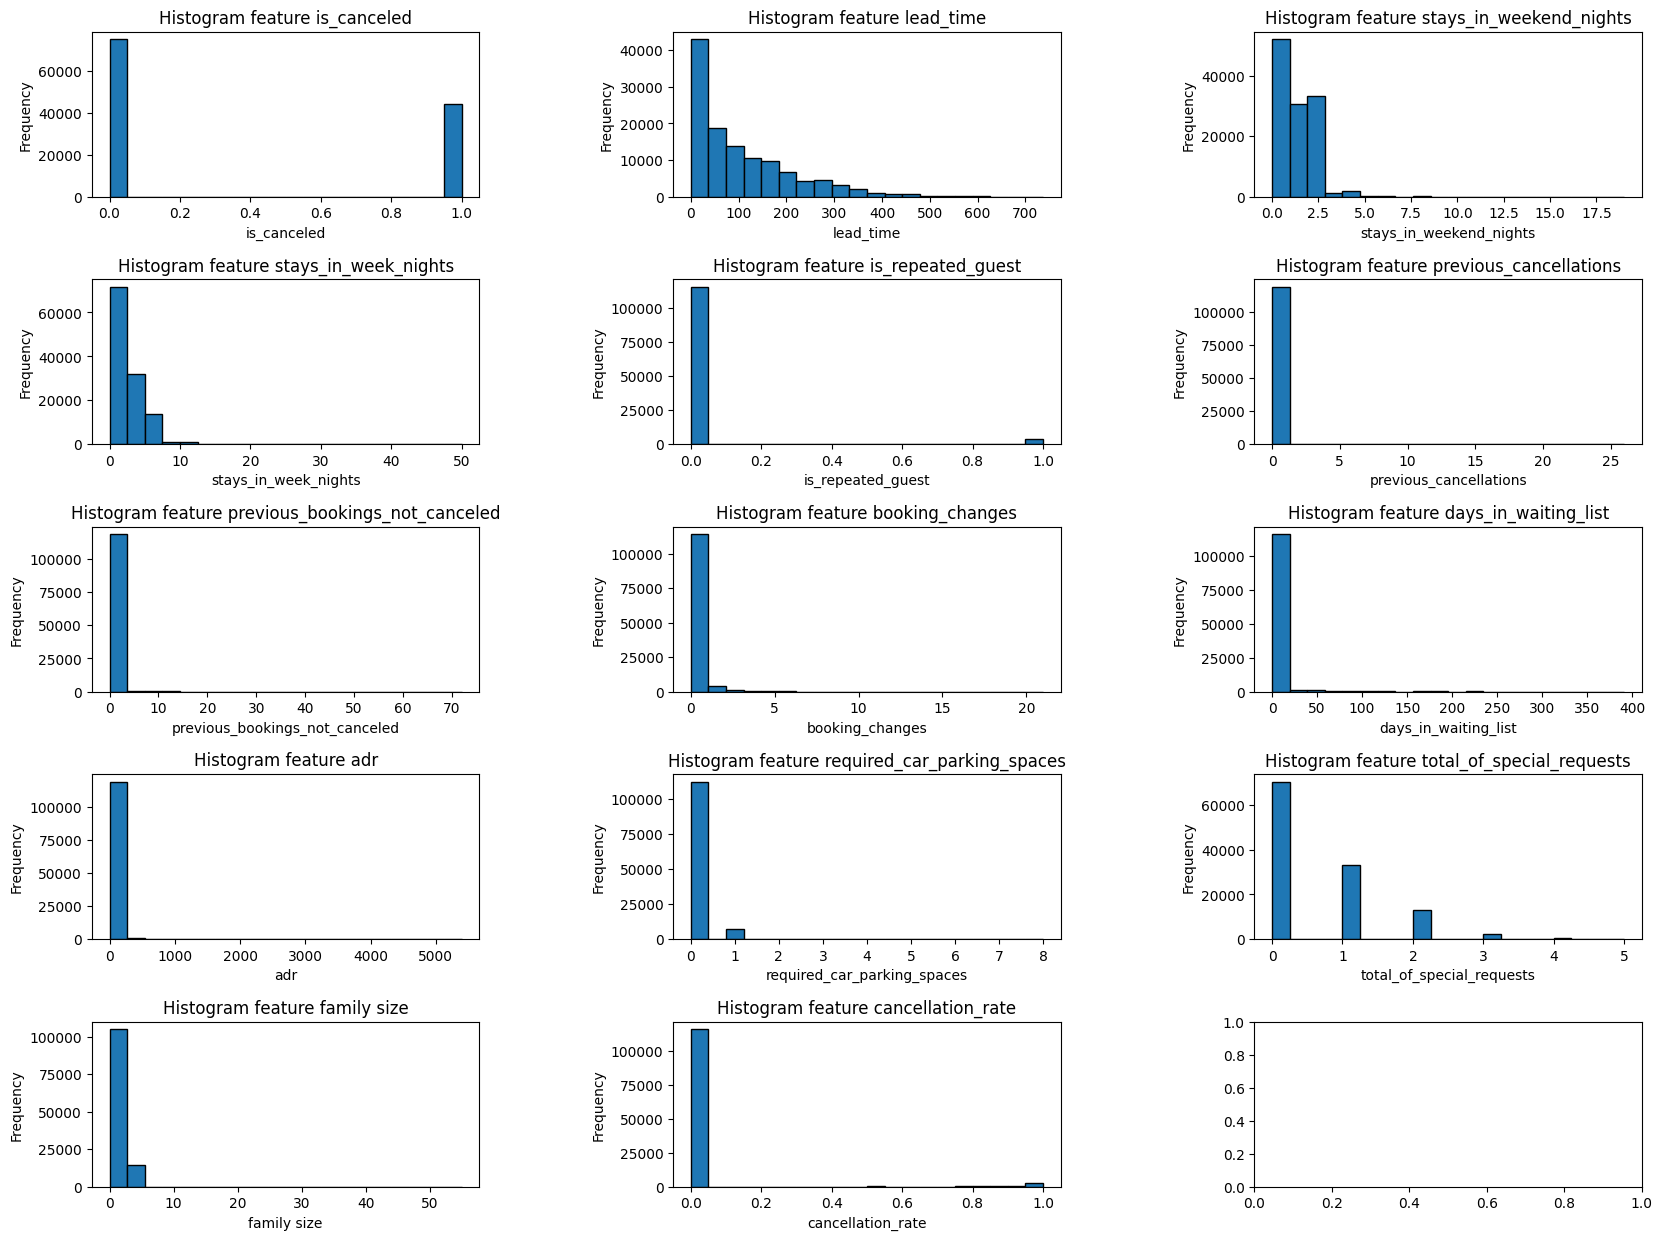

In [175]:
plot_feature(numerical_features)

**Drop imbalanced data**

In [176]:
numerical_features.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'family size', 'cancellation_rate'],
      dtype='object')

In [177]:
imbalanced_numerical_features = ['is_repeated_guest', 'previous_cancellations',
                                 'previous_bookings_not_canceled',
                                 'booking_changes', 'days_in_waiting_list',
                                 'required_car_parking_spaces', 'cancellation_rate']

In [178]:
for feature in imbalanced_numerical_features:
  numerical_features.drop(feature, axis=1, inplace=True)

In [179]:
numerical_features.columns


Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adr', 'total_of_special_requests',
       'family size'],
      dtype='object')

In [180]:
def plot_box_violine(df):
    # Pour chaque colonne du DataFrame
    for col in df.columns:
        # Créer une figure et deux sous-graphes côte à côte
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        # Créer un boxplot pour la colonne actuelle
        sns.boxplot(data=df, x=col, ax=ax[0])
        ax[0].set_title(f'Boxplot of {col}')  # Définir le titre du boxplot

        # Créer un violinplot pour la colonne actuelle
        sns.violinplot(data=df, x=col, ax=ax[1])
        ax[1].set_title(f'Violinplot of {col}')  # Définir le titre du violinplot

    # Afficher tous les graphiques
    plt.show()
    # Fermer toutes les figures pour libérer de la mémoire
    plt.close('all')


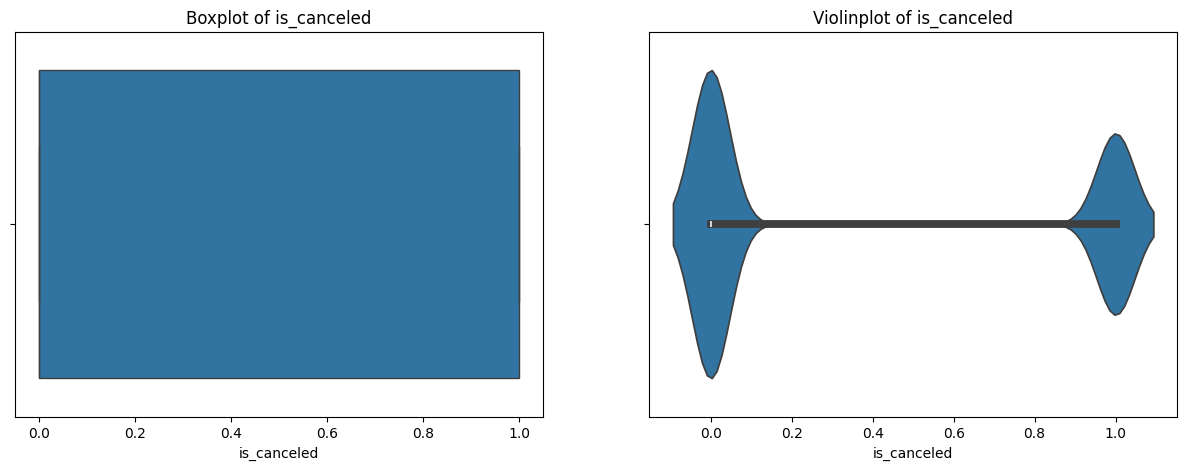

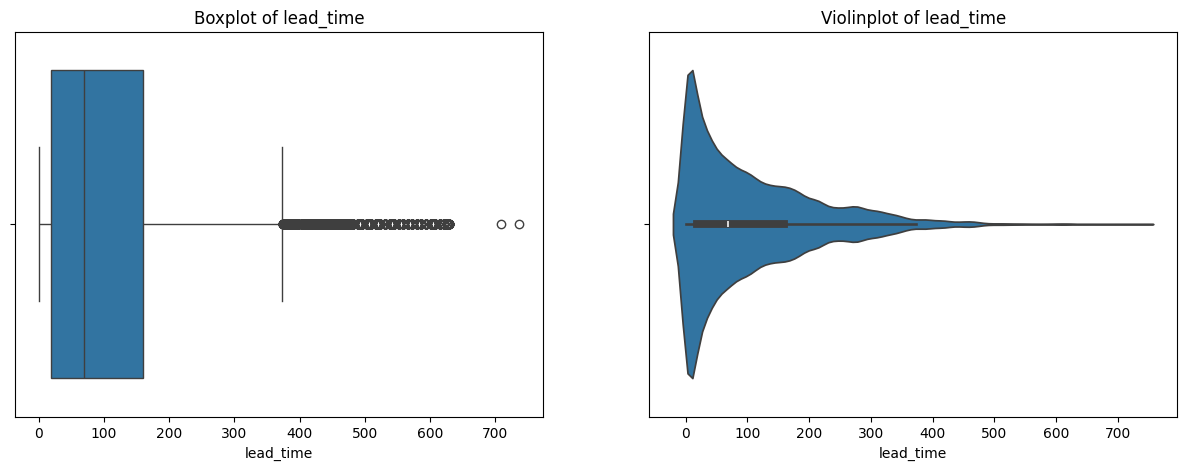

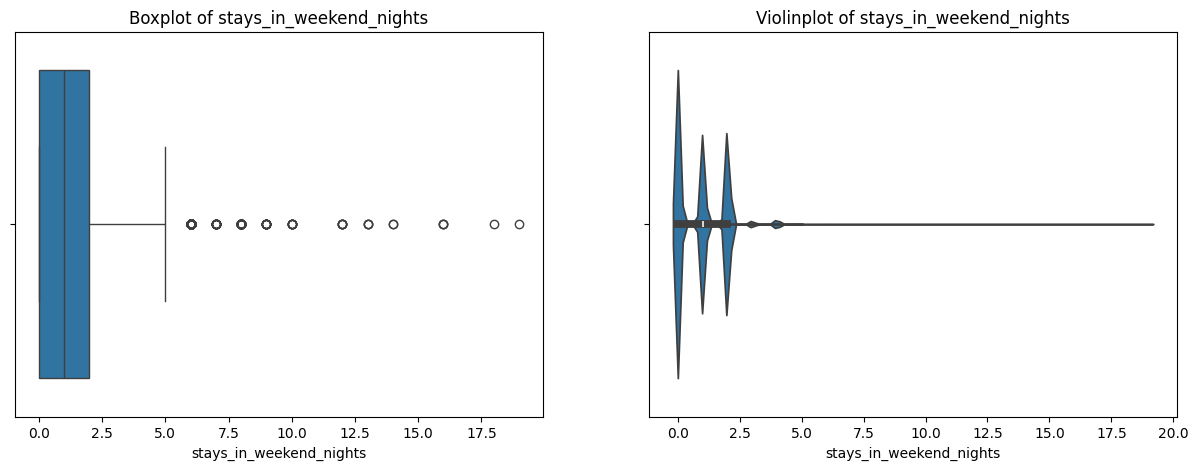

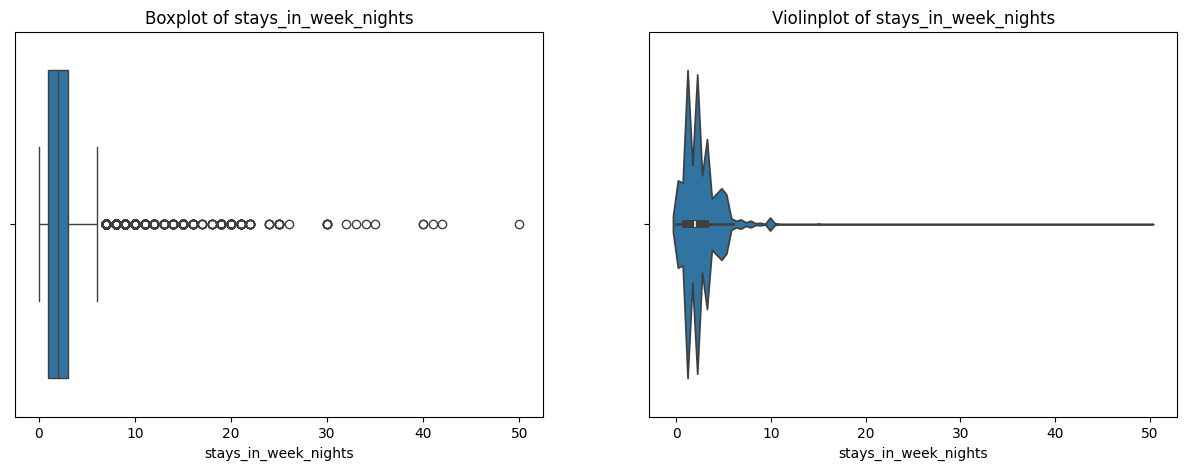

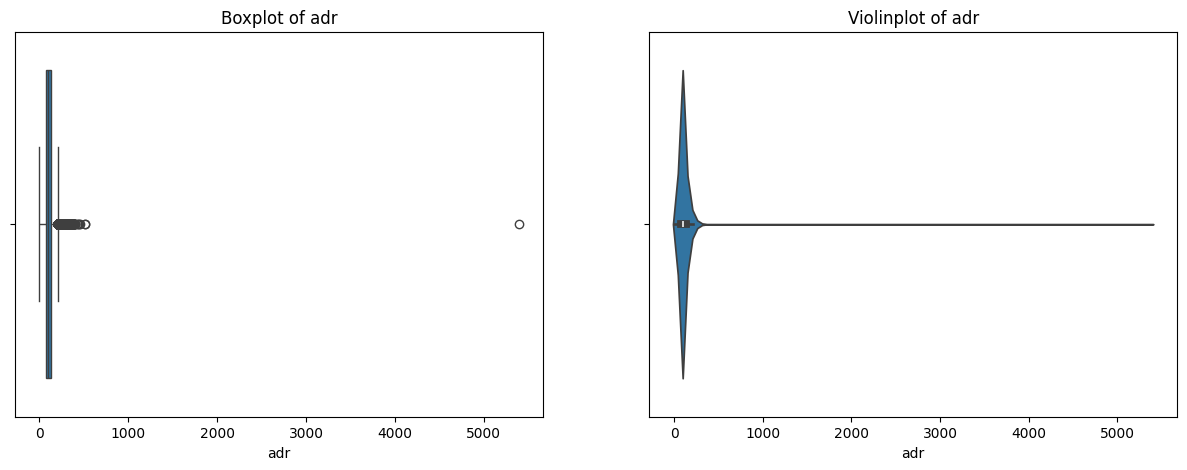

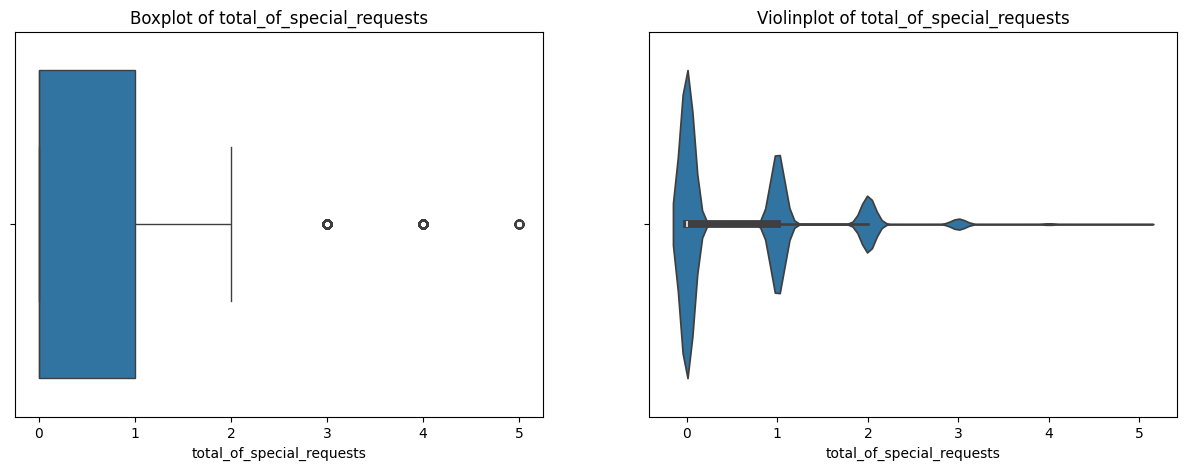

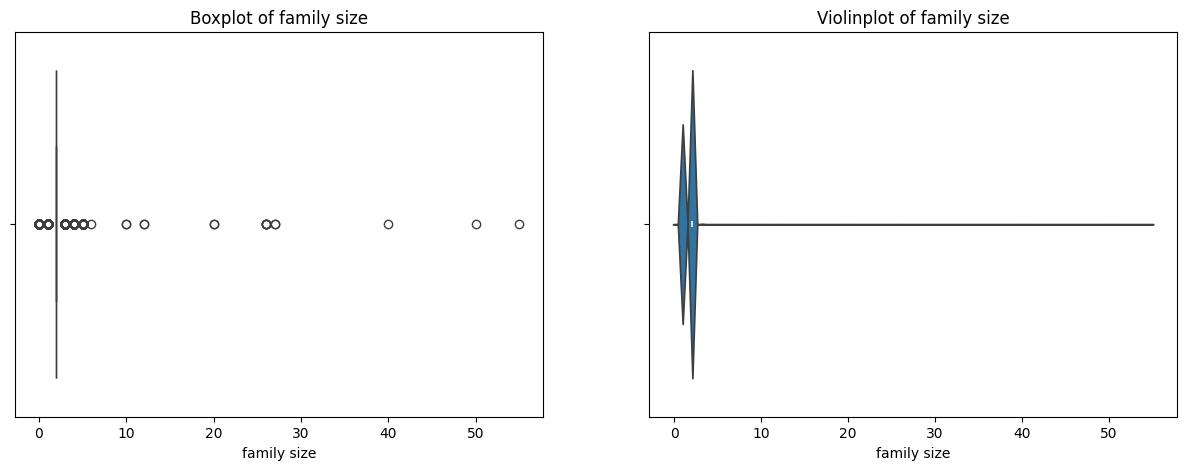

In [181]:
plot_box_violine(numerical_features)

In [182]:
# funtion pour limiter les valeurs extremes
def winsorize_dataframe(df, lower_percentile, upper_percentile):
    # copie du DataFrame original pour ne pas le modifier directement
    winsorized_df = df.copy()

    # boucle à travers chaque colonne du DataFrame
    for column in df.columns:
        # calcule la valeur limite inférieure à partir du percentile inférieur spécifié
        lower_limit = np.percentile(df[column], lower_percentile)
        # calcule la valeur limite supérieure à partir du percentile supérieur spécifié
        upper_limit = np.percentile(df[column], upper_percentile)

        # remplace les valeurs inférieures à la limite inférieure par cette limite
        winsorized_df[column] = np.where(winsorized_df[column] < lower_limit, lower_limit, winsorized_df[column])
        # remplace les valeurs supérieures à la limite supérieure par cette limite
        winsorized_df[column] = np.where(winsorized_df[column] > upper_limit, upper_limit, winsorized_df[column])

    # retourne le DataFrame modifié avec les valeurs extrêmes limitées
    return winsorized_df


In [183]:
numerical_features = winsorize_dataframe(numerical_features, lower_percentile=1, upper_percentile=95)

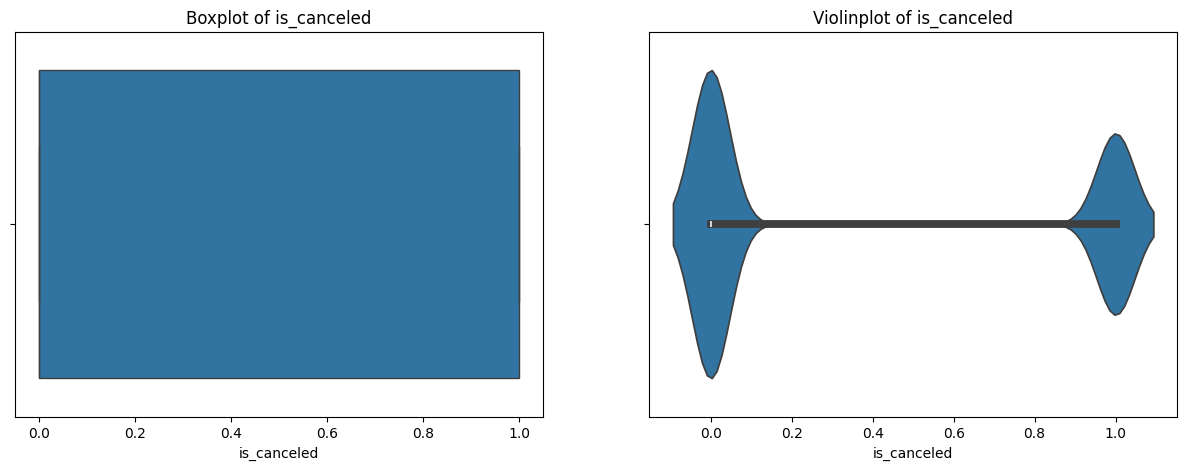

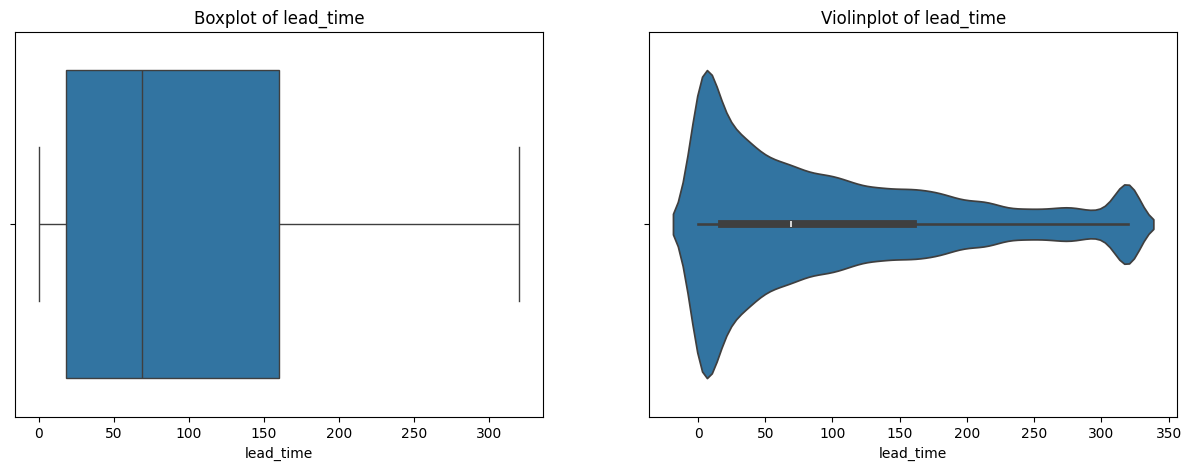

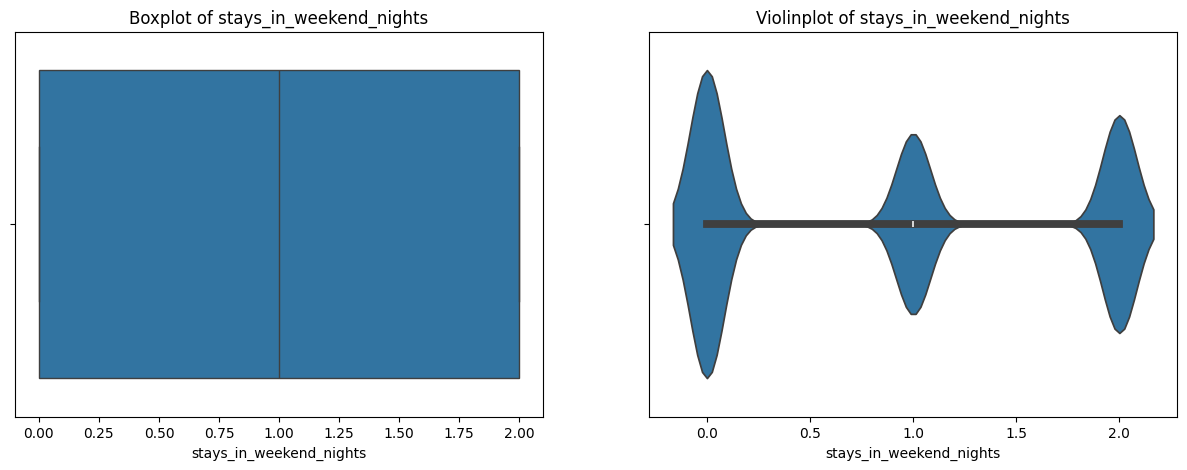

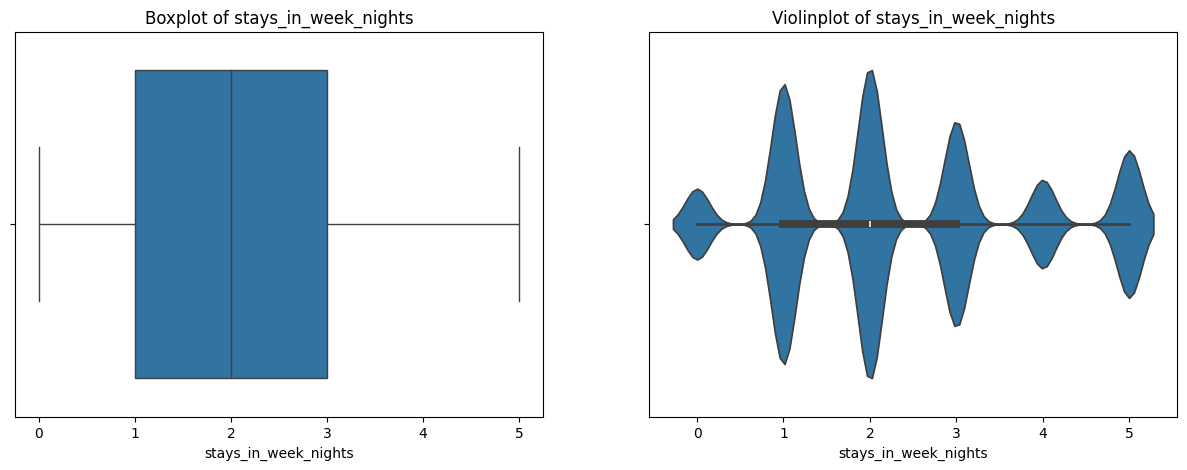

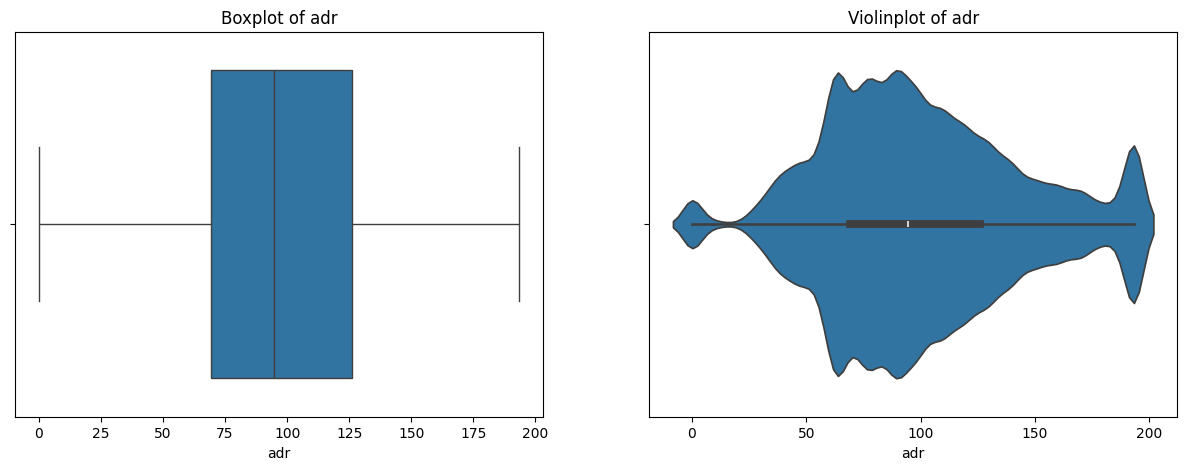

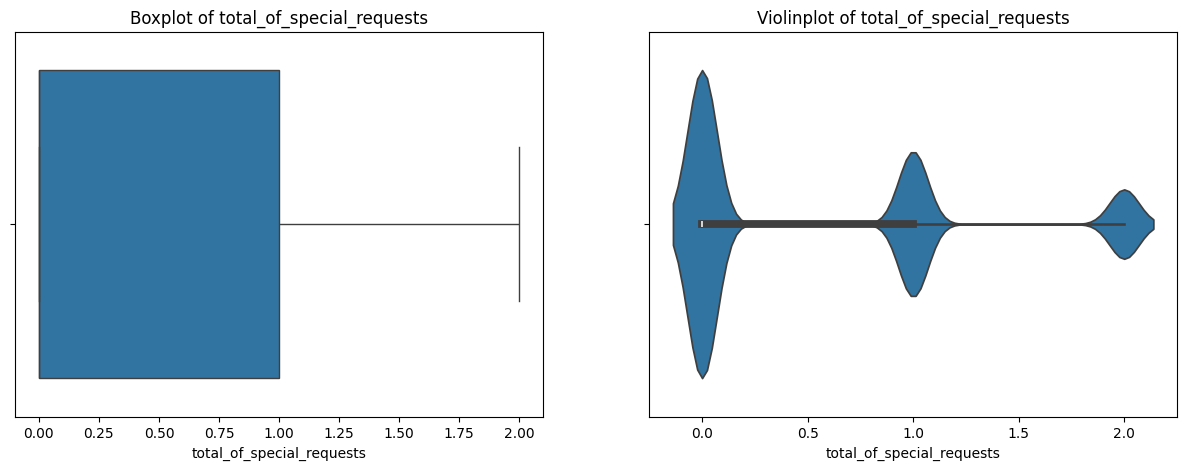

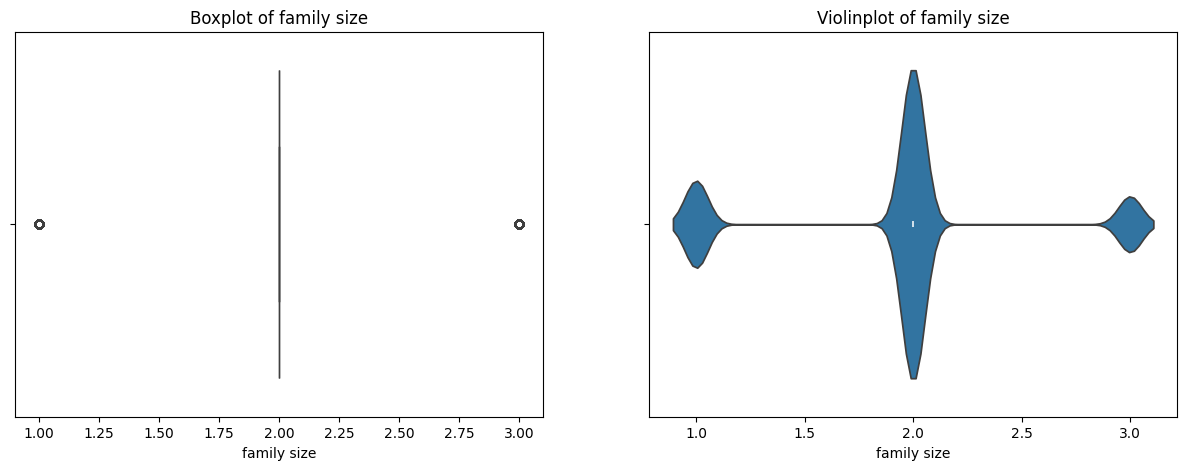

In [184]:
plot_box_violine(numerical_features)

**Categorical features**

In [185]:
#select categorical features

categorical_features = df.select_dtypes(include=['object'])

In [186]:
categorical_features.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [187]:
for i in categorical_features.columns.tolist():
  print(f"{i}  >>>>>>>>>>>> {categorical_features[i].nunique()}")

hotel  >>>>>>>>>>>> 2
meal  >>>>>>>>>>>> 5
country  >>>>>>>>>>>> 40
market_segment  >>>>>>>>>>>> 8
distribution_channel  >>>>>>>>>>>> 5
reserved_room_type  >>>>>>>>>>>> 10
assigned_room_type  >>>>>>>>>>>> 12
deposit_type  >>>>>>>>>>>> 3
customer_type  >>>>>>>>>>>> 4
reservation_status  >>>>>>>>>>>> 3
reservation_status_date  >>>>>>>>>>>> 926


**Observed imbalanced features**

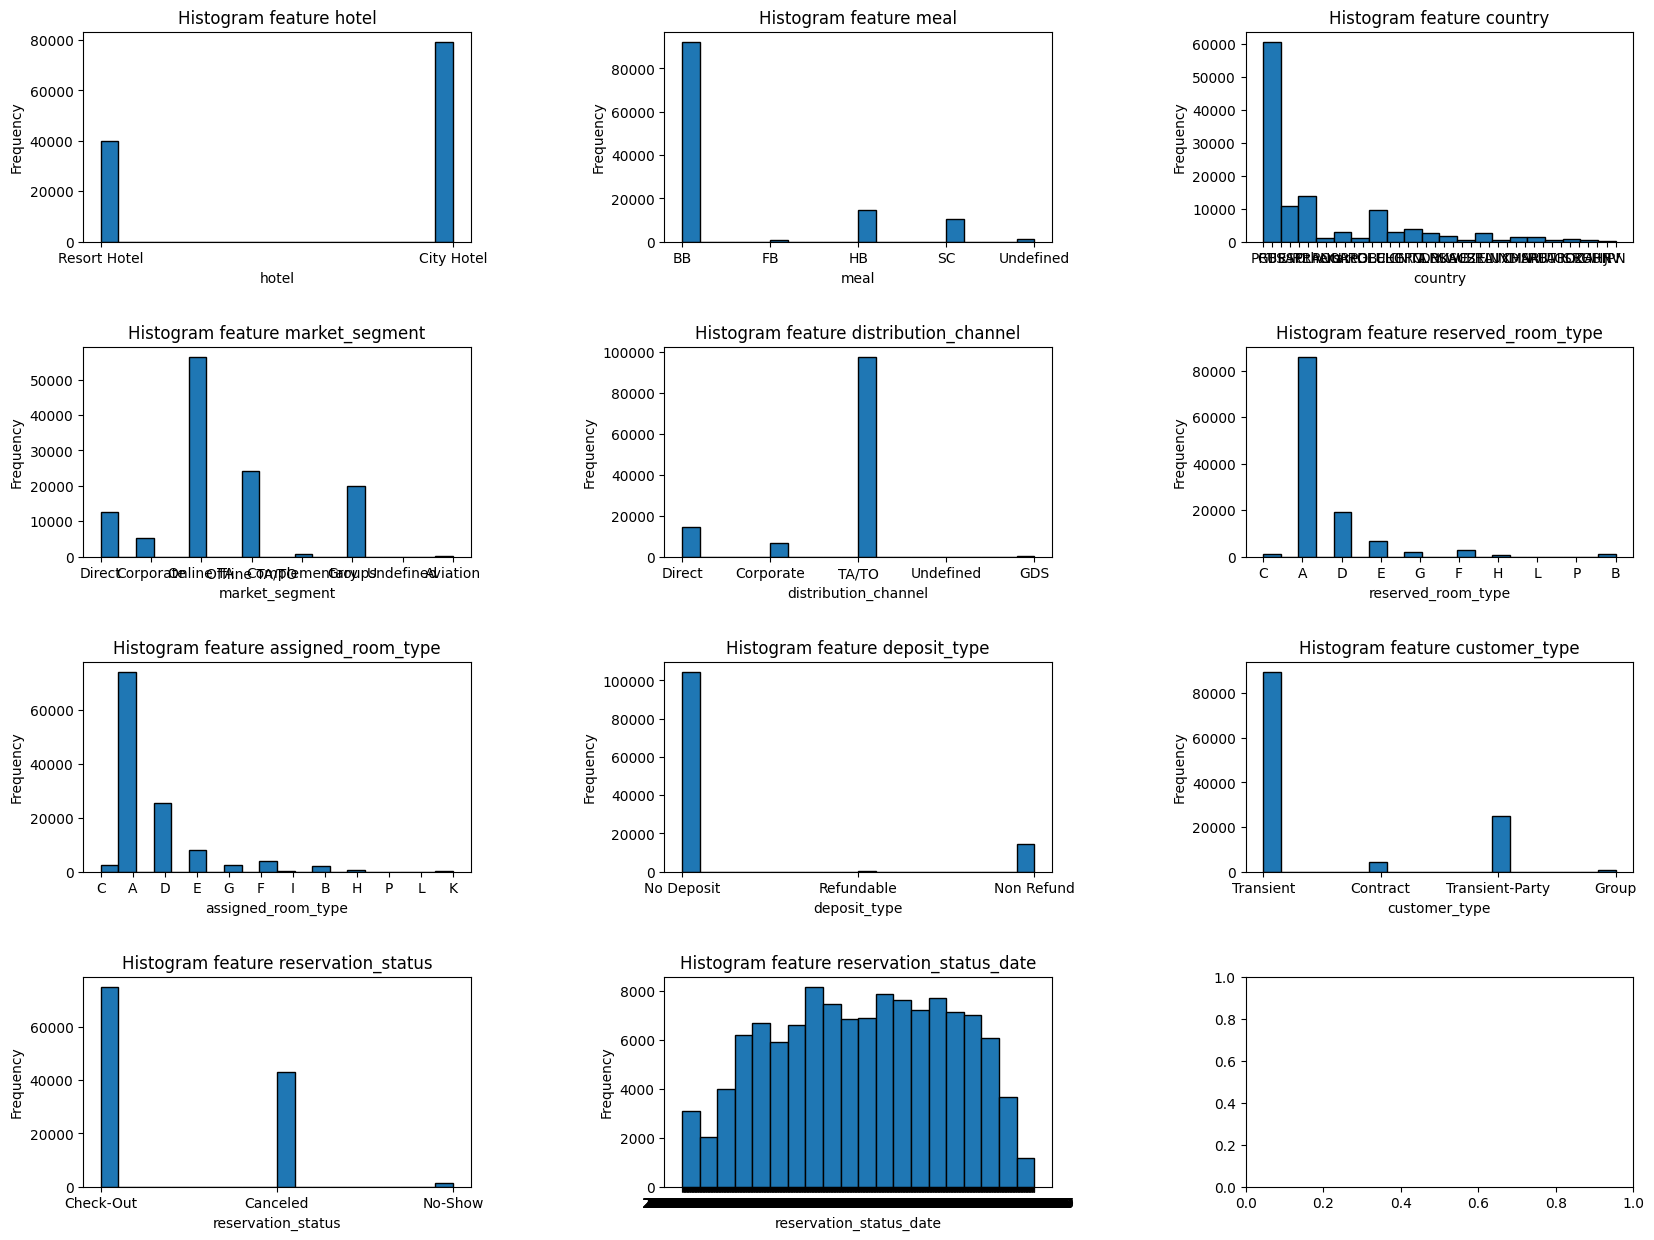

In [188]:
plot_feature(categorical_features)

**Drop imbalanced eatures*

In [189]:
imbalanced_categorical_features = ['meal', 'distribution_channel', 'reservation_status_date']

In [190]:
for feature in imbalanced_categorical_features:
  categorical_features.drop(feature, axis=1, inplace=True)

**Engineer categorical features**

In [191]:
categorical_features.columns

Index(['hotel', 'country', 'market_segment', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [192]:
categorical_features['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [193]:
categorical_features['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [194]:


# create a new feature "reservation changed"
#ce code ajoute une nouvelle colonne reservation_changed au DataFrame categorical_features, indiquant si la chambre réservée initialement a été changée ou non pour chaque réservation.

categorical_features['reservation_changed'] = categorical_features.apply(lambda row: 'yes' if row['reserved_room_type'] != row['assigned_room_type'] else 'no', axis=1)



In [195]:
categorical_features.head()

,hotel,country,market_segment,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_changed
0,Resort Hotel,PRT,Direct,C,C,No Deposit,Transient,Check-Out,no
1,Resort Hotel,PRT,Direct,C,C,No Deposit,Transient,Check-Out,no
2,Resort Hotel,GBR,Direct,A,C,No Deposit,Transient,Check-Out,yes
3,Resort Hotel,GBR,Corporate,A,A,No Deposit,Transient,Check-Out,no
4,Resort Hotel,GBR,Online TA,A,A,No Deposit,Transient,Check-Out,no


In [196]:
# maintenant , on supprime les 2 colonnes
categorical_features.drop(['reserved_room_type', 'assigned_room_type'], axis=1, inplace=True)

**Deposite  type**

In [197]:
# ce code convertit toutes les valeurs de deposit_type qui ne sont pas 'No Deposit' en 'deposit' dans le DataFrame categorical_features.
categorical_features.loc[categorical_features['deposit_type'] != 'No Deposit', 'deposit_type'] = 'deposit'

**Reservation status**

In [198]:

categorical_features.loc[categorical_features['reservation_status'] != 'Check-Out', 'reservation_status'] = 'Not check-out'

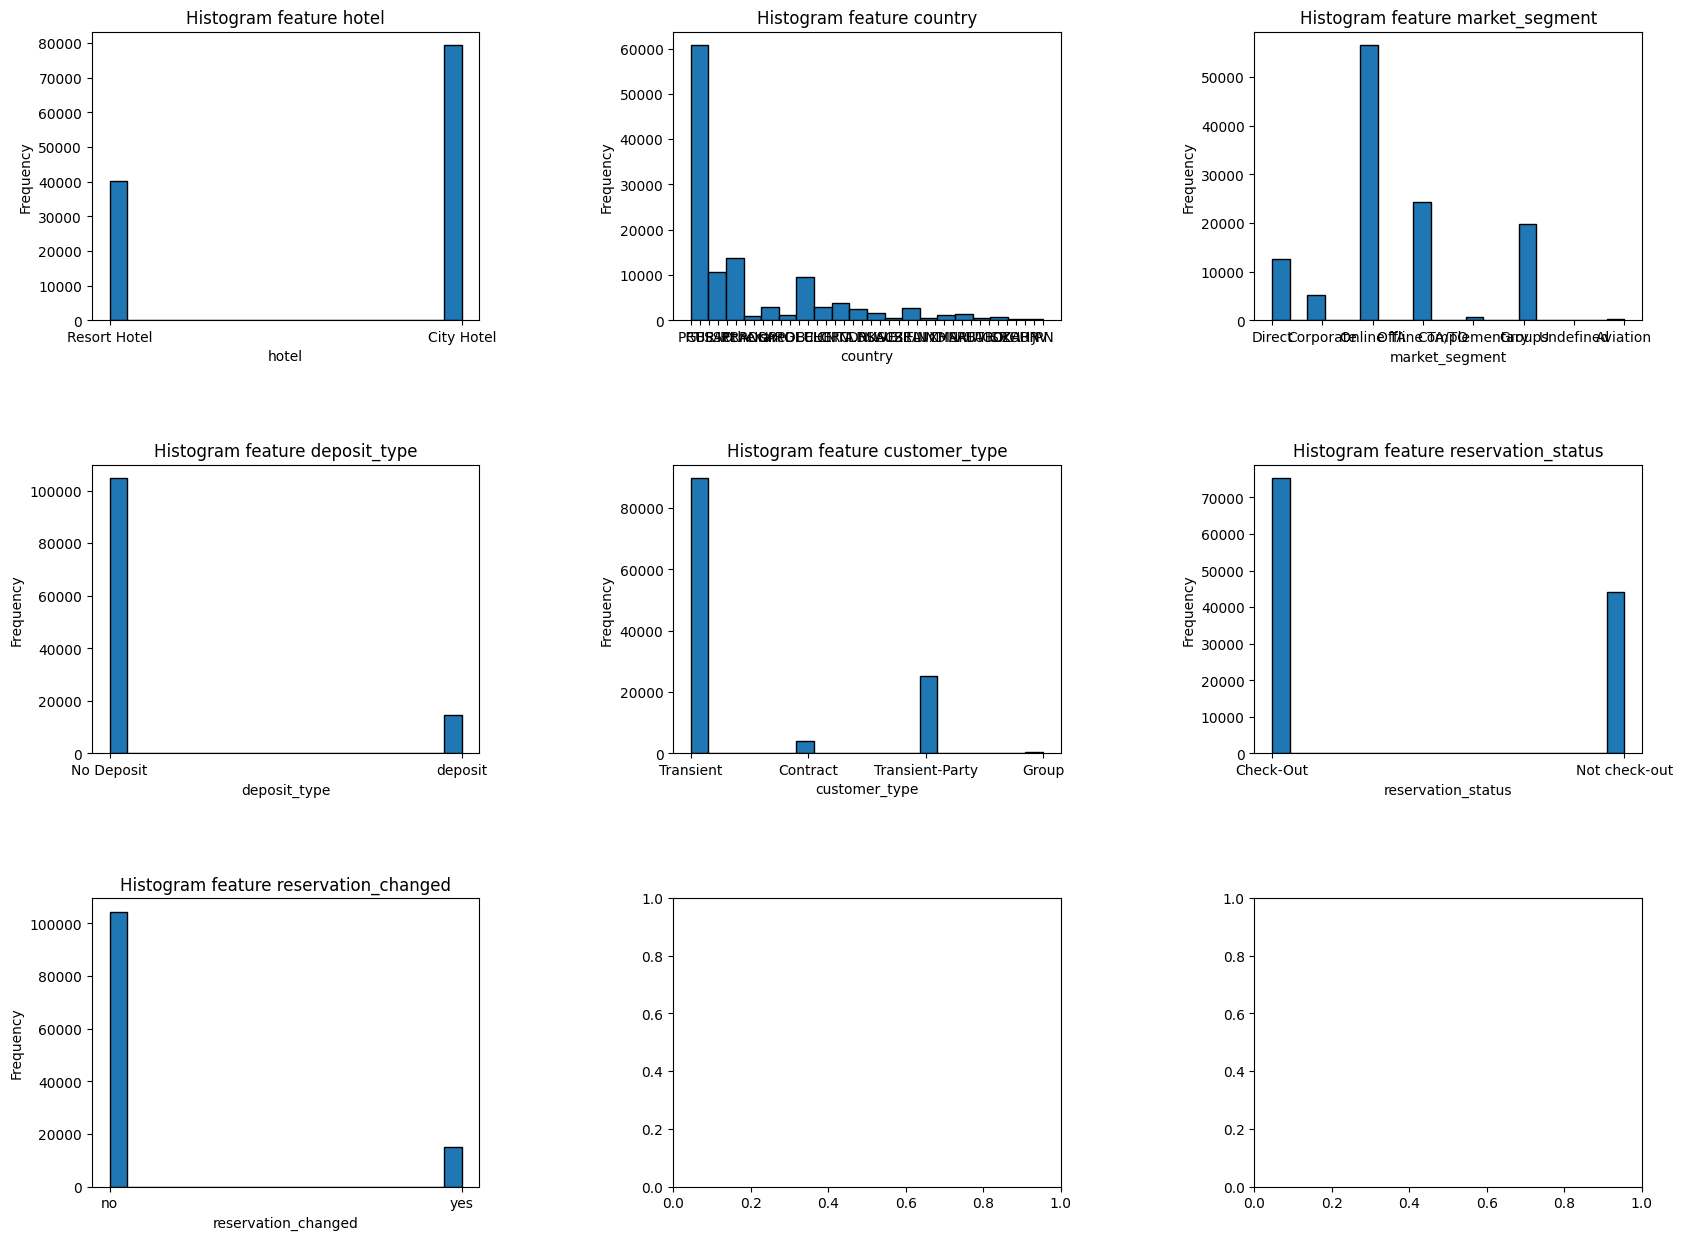

In [199]:
plot_feature(categorical_features)

## E D A

In [200]:
numerical_features.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adr', 'total_of_special_requests',
       'family size'],
      dtype='object')

In [201]:

# fonction pour creer un graphique cirgulaire
def plot_piechart(df, col):
  # definir la taille
  plt.figure(figsize = (6, 6))
  # calculer le nombre de chaque valeur
  df_count = df[col].value_counts()
  # creer le graphique
  plt.pie(df_count, labels=df_count.index, autopct='%1.1f%%', startangle=180)
  # ajouter le titre
  plt.title(f' Pie chart of {col} ')
  # afficher le graphique
  plt.show()
  # fermer la figure
  plt.close('all')


#######################################################

# function pour creer un histogramme
def plot_hist(df, col_1, col_2,col_3):

  num_cols = [col_1, col_2,col_3]

  fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 5))

  for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
      sns.histplot(df[num_cols[i]], bins =30, ax=ax, kde= True)
      ax.set_title(f'Histogram of {num_cols[i]}')

  plt.tight_layout()
  plt.show()
  plt.close('all')
  # creer

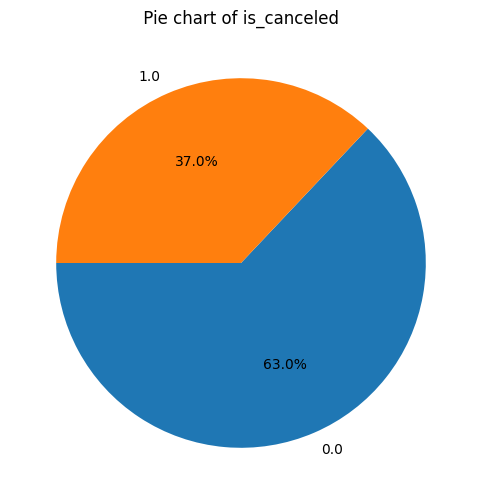

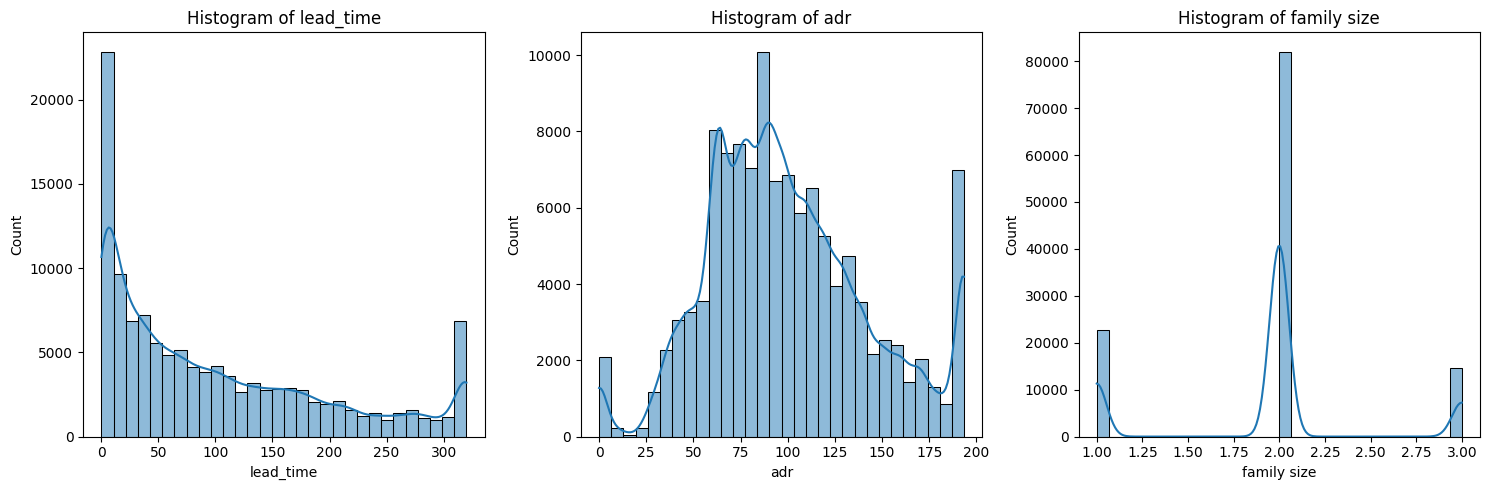

In [202]:

plot_piechart(numerical_features, 'is_canceled')

print("\n \n \n")
plot_hist(numerical_features, 'lead_time','adr', 'family size')

**Multivariate Analysis**

In [203]:

def plot_heatmap(df):

  # Calculer la matrice de corrélation
  correlation_matrix = df.corr()

  # Créer la figure et l'axe
  mask = np.zeros_like(correlation_matrix)

  # Mettre True sur la diagonale
  mask[np.triu_indices_from(mask)] = True

  # Créer la figure et l'axe
  fig, ax = plt.subplots(figsize=(10, 8))

  # Créer le graphique
  sns.heatmap(correlation_matrix, mask=mask, vmin = -1, annot=True, cmap='CMRmap_r', ax=ax, fmt = '.1g')

  # Ajouter un titre
  ax.set_title('Correlation Heatmap')

  # Afficher le graphique
  plt.show()
  # Fermer la figure
  plt.close('all')

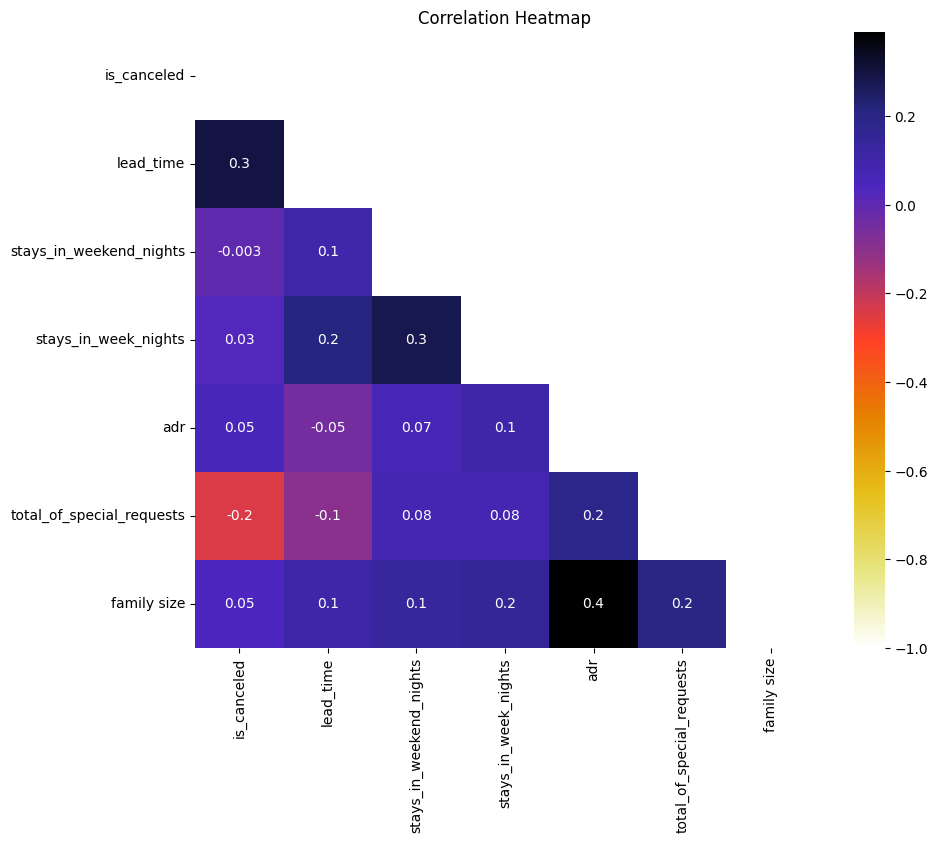

In [204]:
plot_heatmap(numerical_features)

**Categorical features**

In [205]:
categorical_features.columns

Index(['hotel', 'country', 'market_segment', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_changed'],
      dtype='object')

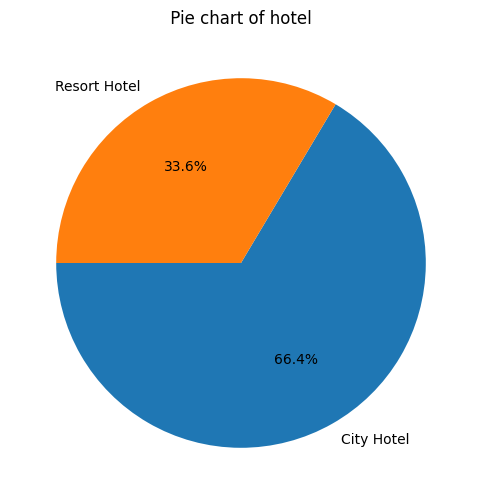

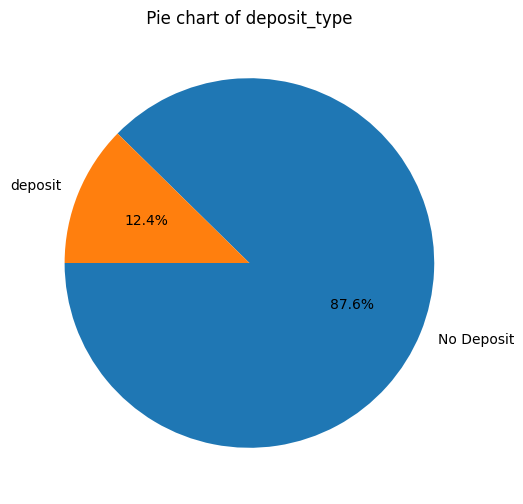

In [206]:
plot_piechart(categorical_features, 'hotel')

print("\n \n \n")




print("\n \n \n")
plot_piechart(categorical_features, 'deposit_type')

In [207]:


def plot_barchart(df, col_1, col_2, col_3):

  # colonnes
  features = [col_1, col_2, col_3]


  fig, axes = plt.subplots(1, len(features), figsize=(15, 5))


  for i, feature in enumerate(features):
    value_counts = df[feature].value_counts()
    ax=axes[i]
      # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.set_title(f'Bar chart  of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_xticklabels(value_counts.index, rotation=45)

  plt.tight_layout()
  plt.show()
  plt.close('all')

In [208]:
categorical_features.columns


Index(['hotel', 'country', 'market_segment', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_changed'],
      dtype='object')

<ipython-input-207-2d76119e0717>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45)
<ipython-input-207-2d76119e0717>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45)
<ipython-input-207-2d76119e0717>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45)


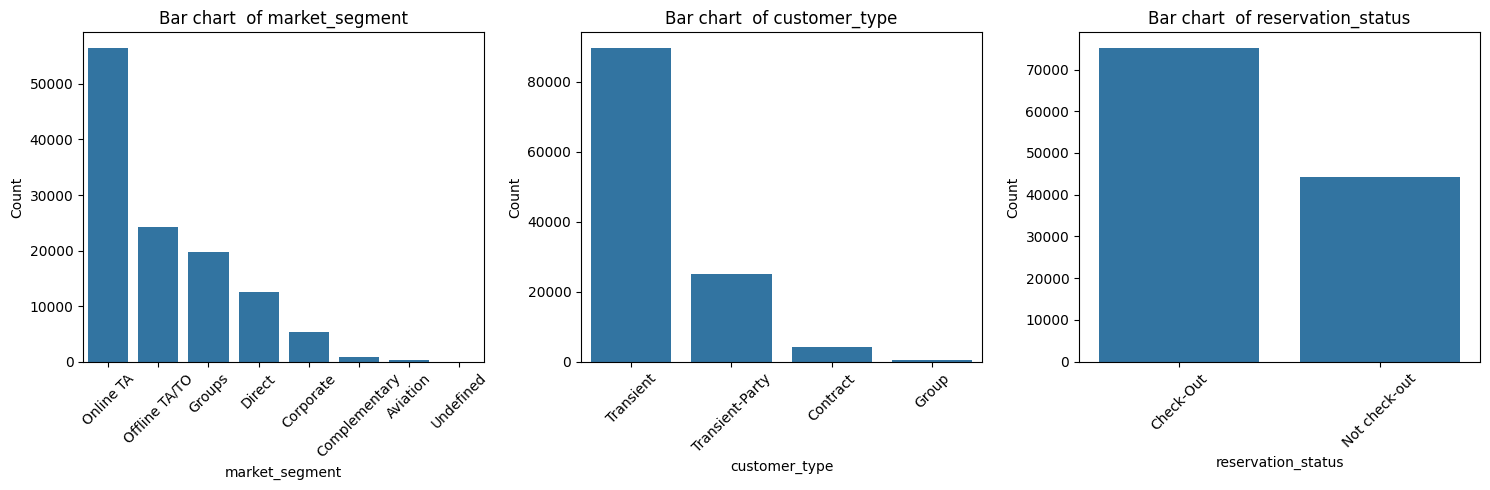

In [209]:
plot_barchart(categorical_features, 'market_segment', 'customer_type', 'reservation_status')

In [210]:
categorical_features['reservation_changed'].value_counts()

reservation_changed
no     104473
yes     14917
Name: count, dtype: int64

In [211]:

def plot_count(df_1, df_2, col_1, col_2, col_3):

  df = pd.concat([df_1, df_2], axis=1)

  features = [col_1, col_2, col_3]

  fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

  for i, feature in enumerate(features):
    ax  = axes[i]
    sns.countplot(x=feature, hue= col_3, data=df, ax=ax)
    ax.set_title(f'Count plot of {feature} by {col_3}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

  plt.tight_layout()
  plt.show()
  plt.close('all')



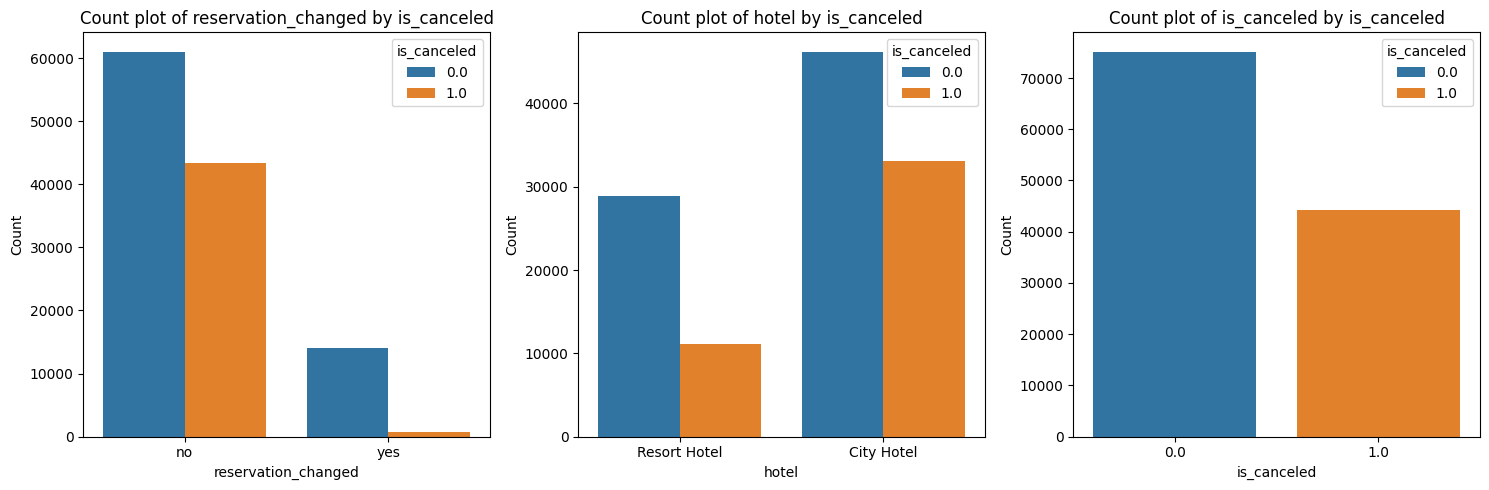

In [212]:
plot_count(categorical_features, numerical_features, 'reservation_changed',  'hotel', 'is_canceled')

**Create dumies variables  and scaled data numerical  features**

create dumies variables

In [213]:
'''def create_dummy(df):
  for col in df.columns.tolist():
    df = pd.get_dummies(df, columns=[col], drop_first=True)
  return df'''

def create_dummy(df):
  df = pd.get_dummies(df, columns=df.columns.tolist(), drop_first=True).astype(int)
  return df

dummy_categorical_features = create_dummy(categorical_features)

In [214]:
dummy_categorical_features = create_dummy(categorical_features)

In [215]:
dummy_categorical_features.head()

,hotel_Resort Hotel,country_ARG,country_AUS,country_AUT,country_BEL,country_BRA,country_CHE,country_CHN,country_CN,country_CZE,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_deposit,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Not check-out,reservation_changed_yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


Scale numerical features

In [216]:
# import libraries

import sklearn
from sklearn.preprocessing import StandardScaler

In [217]:
scaler = StandardScaler()

scaled_numerical_data = scaler.fit_transform(numerical_features)

scaled_numerical_data = pd.DataFrame(data =scaled_numerical_data, index = numerical_features.index ,columns=numerical_features.columns)

In [218]:
scaled_numerical_data

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,family size
0,-0.76704,2.273997,-1.023051,-1.638048,-2.321855,-0.758773,0.123491
1,-0.76704,2.273997,-1.023051,-1.638048,-2.321855,-0.758773,0.123491
2,-0.76704,-0.966614,-1.023051,-0.945419,-0.579572,-0.758773,-1.678237
3,-0.76704,-0.904493,-1.023051,-0.945419,-0.579572,-0.758773,-1.678237
4,-0.76704,-0.894140,-1.023051,-0.252790,-0.045272,0.636678,0.123491
...,...,...,...,...,...,...,...
119385,-0.76704,-0.800960,1.322271,1.825096,-0.088481,-0.758773,0.123491
119386,-0.76704,0.016958,1.322271,1.825096,2.173234,2.032130,1.925218
119387,-0.76704,-0.687072,1.322271,1.825096,1.341817,2.032130,0.123491
119388,-0.76704,0.089432,1.322271,1.825096,0.103403,-0.758773,0.123491


**Combine numerical and categorical transformed features**

In [219]:
final_df = pd.concat([scaled_numerical_data, dummy_categorical_features], axis=1)

In [220]:
final_df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,family size,hotel_Resort Hotel,country_ARG,country_AUS,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_deposit,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Not check-out,reservation_changed_yes
0,-0.76704,2.273997,-1.023051,-1.638048,-2.321855,-0.758773,0.123491,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.76704,2.273997,-1.023051,-1.638048,-2.321855,-0.758773,0.123491,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.76704,-0.966614,-1.023051,-0.945419,-0.579572,-0.758773,-1.678237,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.76704,-0.904493,-1.023051,-0.945419,-0.579572,-0.758773,-1.678237,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.76704,-0.894140,-1.023051,-0.252790,-0.045272,0.636678,0.123491,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [221]:
final_df.shape

(119390, 60)

**PCA**

In [222]:
from sklearn.decomposition import PCA

In [223]:
pca = PCA(n_components=60, random_state=1)



In [224]:
pca_data = pca.fit_transform(final_df)

pca_data = pd.DataFrame(data=pca_data, index= final_df.index)

In [225]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-2.206013,-0.241710,0.556067,2.106107,-0.414870,1.683509,-0.817958,-0.958757,-1.225891,-0.661635,...,0.001743,0.001419,0.002489,0.003311,0.002540,0.000544,0.002989,0.001592,-0.000066,2.402892e-13
1,-2.206013,-0.241710,0.556067,2.106107,-0.414870,1.683509,-0.817958,-0.958757,-1.225891,-0.661635,...,0.001743,0.001419,0.002489,0.003311,0.002540,0.000544,0.002989,0.001592,-0.000066,-7.094247e-17
2,-1.602617,-2.060987,0.021894,-0.370349,-0.290125,-0.498420,0.267611,-0.448183,-0.569112,-0.627321,...,-0.000339,-0.001337,-0.000153,-0.000138,0.000965,0.001248,-0.002207,-0.001514,0.000135,-5.159640e-18
3,-1.644675,-1.949402,0.029444,-0.339272,-0.204880,-0.515288,0.362001,-0.559435,-0.327162,-0.545284,...,-0.000360,-0.000251,-0.000451,0.000768,-0.000346,-0.000055,-0.003871,0.000519,0.000127,9.328821e-18
4,0.542318,-1.491085,-0.461569,0.415336,0.080606,-0.522264,-0.485662,-0.416595,-0.001777,-0.572050,...,-0.001193,0.000509,0.001697,0.000695,-0.000422,-0.000267,0.000739,0.000818,-0.000019,1.037993e-17


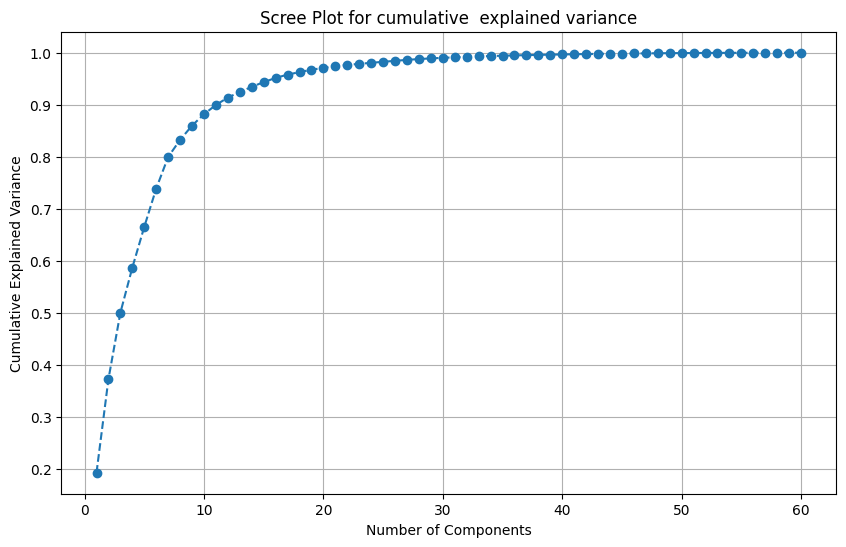

In [227]:

cumulated_variance = np.cumsum(pca.explained_variance_ratio_)

# creat the scree plot

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulated_variance) + 1), cumulated_variance, marker='o', linestyle='--')
plt.title('Scree Plot for cumulative  explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
plt.close('all')

In [231]:

importance = pd.DataFrame(data = pca.explained_variance_ratio_)

importance = importance.T
#importance.columns = ['importance']

print(f"Variance captured  by the  first  20 components : {importance.loc[:, 0:20].sum(axis = 1).values} \t")



Variance captured  by the  first  20 components : [0.97396618] 	


In [232]:
importance

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.192906,0.179878,0.127663,0.086634,0.07832,0.073585,0.060729,0.032792,0.027407,0.021942,...,0.000137,0.00012,0.000114,0.000094,0.00009,0.000088,0.000034,0.000008,0.000002,5.080440e-32


## Apply K-means

In [233]:
from sklearn.cluster import KMeans

In [234]:
pca_df = pca_data.iloc[:, :20]

In [235]:
num_clusters = range(1,10)

inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

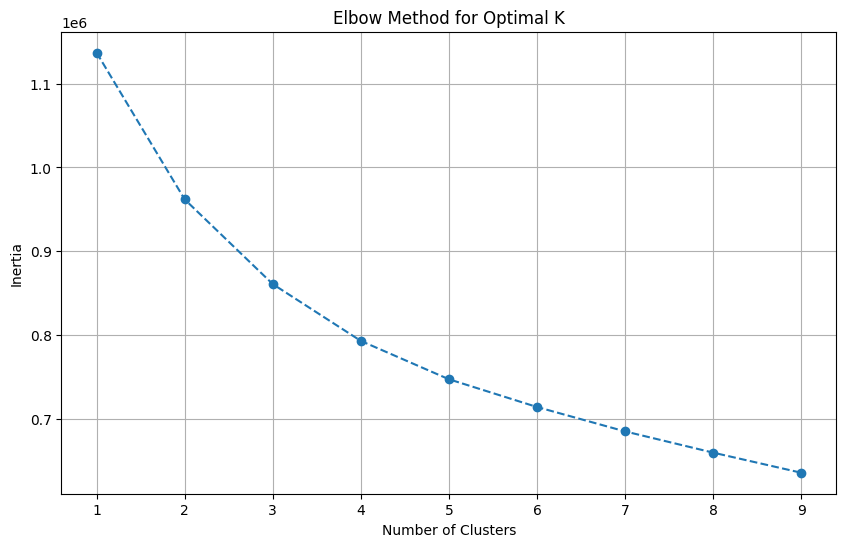

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
plt.close('all')

**Mini-batch K-means**

In [237]:
from sklearn.cluster import MiniBatchKMeans

In [238]:
num_range =  range(2,15)
inertia = []

for k in num_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

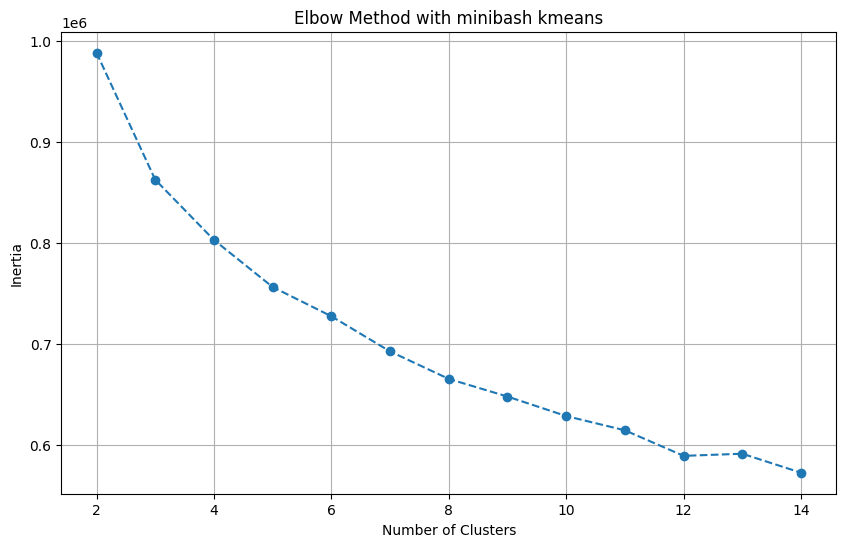

In [239]:
plt.figure(figsize=(10, 6))
plt.plot(num_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method with minibash kmeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
plt.close('all')

##**DScan**

K-distance graph method

In [240]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [241]:
k= 40
nbrs = NearestNeighbors(n_neighbors=k)
nbrs = nbrs.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)





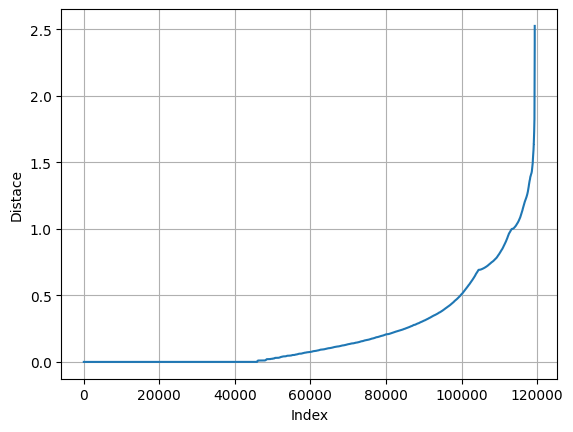

In [242]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]
#plt.figure(figsize=(10, 6))

plt.plot(distances)
plt.xlabel('Index')
plt.ylabel('Distace')
plt.grid(True)

plt.show()
plt.close('all')

# Implement DBscan  with  value  eps of 2 and min_sample of 40

In [243]:

db_cluster = DBSCAN(eps=1.8, min_samples=40)

db_cluster = db_cluster.fit(pca_df)

db_labels = db_cluster.labels_

In [245]:
from  sklearn.metrics import silhouette_score

it range  from  a value  of -1 , 0,  1

In [246]:
silhouette_score = silhouette_score(pca_df, db_labels)

print(f"Silhouette score : {silhouette_score}")

Silhouette score : 0.11762258833533214


##Visualize clusters

In [247]:
pca_2D = pca_data.iloc[:, :2]




In [248]:
pca_2D['clusters'] = db_labels

<ipython-input-248-d8aec847053c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_2D['clusters'] = db_labels


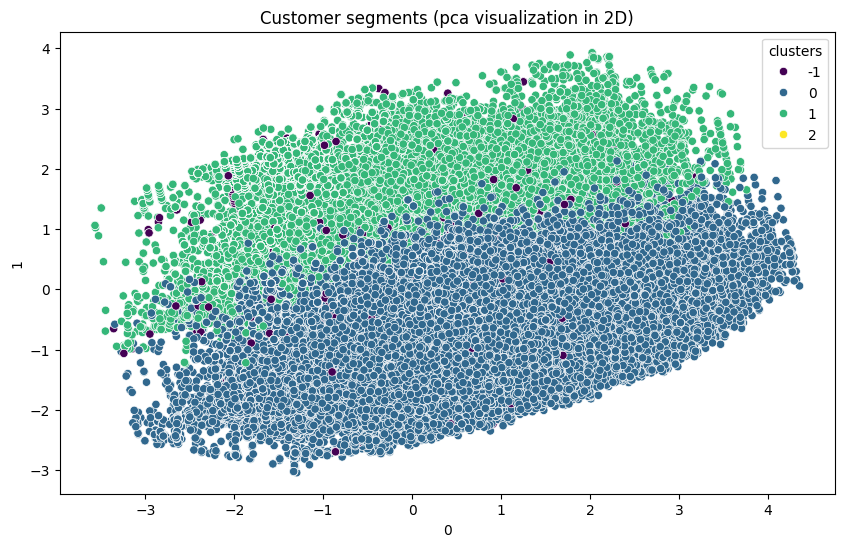

In [249]:
# visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=0, y= 1, hue='clusters', data=pca_2D, palette='viridis')
plt.title('Customer segments (pca visualization in 2D)')
plt.show()
plt.close('all')

#Cluster characteristics

In [250]:
customer_data = pd.concat([numerical_features, categorical_features], axis=1)

In [251]:
customer_data['cluster'] = db_labels

In [252]:
customer_data

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,family size,hotel,country,market_segment,deposit_type,customer_type,reservation_status,reservation_changed,cluster
0,0.0,320.0,0.0,0.0,0.00,0.0,2.0,Resort Hotel,PRT,Direct,No Deposit,Transient,Check-Out,no,-1
1,0.0,320.0,0.0,0.0,0.00,0.0,2.0,Resort Hotel,PRT,Direct,No Deposit,Transient,Check-Out,no,-1
2,0.0,7.0,0.0,1.0,75.00,0.0,1.0,Resort Hotel,GBR,Direct,No Deposit,Transient,Check-Out,yes,0
3,0.0,13.0,0.0,1.0,75.00,0.0,1.0,Resort Hotel,GBR,Corporate,No Deposit,Transient,Check-Out,no,0
4,0.0,14.0,0.0,2.0,98.00,1.0,2.0,Resort Hotel,GBR,Online TA,No Deposit,Transient,Check-Out,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,23.0,2.0,5.0,96.14,0.0,2.0,City Hotel,BEL,Offline TA/TO,No Deposit,Transient,Check-Out,no,0
119386,0.0,102.0,2.0,5.0,193.50,2.0,3.0,City Hotel,FRA,Online TA,No Deposit,Transient,Check-Out,no,0
119387,0.0,34.0,2.0,5.0,157.71,2.0,2.0,City Hotel,DEU,Online TA,No Deposit,Transient,Check-Out,no,0
119388,0.0,109.0,2.0,5.0,104.40,0.0,2.0,City Hotel,GBR,Online TA,No Deposit,Transient,Check-Out,no,0


In [253]:
noise_cluster =  customer_data[customer_data['cluster'] == -1]

cluster_1 = customer_data[customer_data['cluster'] == 0]
cluster_2 = customer_data[customer_data['cluster'] == 1]


In [254]:
cluster_1.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,family size,cluster
count,74529.0,74529.000000,74529.000000,74529.000000,74529.000000,74529.000000,74529.000000,74529.0
mean,0.0,77.882516,0.873123,2.329697,98.277714,0.676743,1.906909,0.0
std,0.0,85.355147,0.850645,1.485441,44.092648,0.741816,0.572841,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,0.0,8.000000,0.000000,1.000000,67.520000,0.000000,2.000000,0.0
50%,0.0,45.000000,1.000000,2.000000,92.670000,1.000000,2.000000,0.0
75%,0.0,123.000000,2.000000,3.000000,125.000000,1.000000,2.000000,0.0
max,0.0,320.000000,2.000000,5.000000,193.500000,2.000000,3.000000,0.0


In [255]:
cluster_2.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,family size,cluster
count,43942.0,43942.000000,43942.000000,43942.000000,43942.000000,43942.000000,43942.000000,43942.0
mean,1.0,137.568067,0.868031,2.419234,103.064642,0.313140,1.966274,1.0
std,0.0,102.174277,0.856805,1.363473,40.679329,0.602695,0.508144,0.0
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,1.0,49.000000,0.000000,1.000000,72.977500,0.000000,2.000000,1.0
50%,1.0,113.000000,1.000000,2.000000,96.300000,0.000000,2.000000,1.0
75%,1.0,214.000000,2.000000,3.000000,127.507500,0.000000,2.000000,1.0
max,1.0,320.000000,2.000000,5.000000,193.500000,2.000000,3.000000,1.0


In [256]:
noise_cluster.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,family size,cluster
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.0
mean,0.343484,144.697929,1.088916,2.582217,86.895323,0.867235,2.169306,-1.0
std,0.475161,114.338645,0.817871,1.694216,58.450300,0.832663,0.936695,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.0
25%,0.000000,29.000000,0.000000,1.000000,43.000000,0.000000,1.000000,-1.0
50%,0.000000,138.000000,1.000000,2.000000,84.000000,1.000000,3.000000,-1.0
75%,1.000000,253.000000,2.000000,4.000000,123.000000,2.000000,3.000000,-1.0
max,1.000000,320.000000,2.000000,5.000000,193.500000,2.000000,3.000000,-1.0


Cluster 1:

Count: 74529.0 data points
• This cluster represents non-canceled reservations (is_canceled = 0).
⚫ lead time has a mean of 77.88, indicating that most bookings in this cluster were made well in advance.
On average, guests in this cluster stayed for 2.41 nights, with a majority staying for either one or two nights.
The average daily rate (ADR) is approximately 98.27, with a relatively moderate standard deviation.
Most guests made 2 special requests on average.
The average family size is 1.9, indicating smaller groups or individuals.



Cluster 2:


Count: 43942.0 data points
• This cluster represents canceled reservations (is_canceled = 1).
• The lead time in this cluster has a higher mean of 137.56, suggesting that bookings in this cluster were made with more advanced notice compared to Cluster 1.
• The average length of stay (stays_in_weekend_nights and stays_in_week_nights) is similar to Cluster 1.
The average daily rate (ADR) is slightly higher at 103.06 with a moderate standard deviation.
Guests in this cluster made fewer special requests on average.
The average family size is similar to Cluster 1.


Noise Cluster:


Count: 821.0 data points
• This cluster represents a mix of canceled and non-canceled reservations (-1 in the "cluster" column).
• The lead time in this cluster is relatively high, with a mean of 136.74.
• The length of stay is higher, with guests staying an average of 5.37 nights.
The ADR is also relatively high at 86.89.
Guests in this cluster made more special requests on average.
• The family size is the highest among the clusters, with an average of 2.60.

CONCLUSION

• Cluster 1 (Non-Canceled Reservations): This cluster represents customers who tend to make non-canceled reservations. They have relatively moderate lead times, indicating that they might make their bookings closer to the check-in date. Their average daily rate is
moderate number of special requests. This cluster may consist of customers who are more impulsive or spontaneous in their booking behavior.


• Cluster 2 (Canceled Reservations): Customers in this cluster tend to cancel their reservations. They typically book with more advanced notice (higher lead time) compared to Cluster 1. Although their average daily rate is slightly higher, they make fewer special reque
who are more price-conscious or those who plan trips well in advance but are more likely to cancel.


Noise Cluster (Mixed Behavior): The noise cluster seems to contain customers with a mix of behaviors, possibly representing a diverse group of customers with varying demographics, booking preferences, and behavior.